<a href="https://colab.research.google.com/github/LanucciG/ml_diabetes/blob/main/MLDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [34]:
import pandas as pd

# Carrega o dataset
url = "https://raw.githubusercontent.com/LanucciG/ml_diabetes/main/diabetes.csv"
df = pd.read_csv(url)
df

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,167.000,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,248.000,1
3,70,45,543,30.5,158.000,1
4,60,23,846,30.1,398.000,1
...,...,...,...,...,...,...
389,88,44,510,43.3,222.000,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,766.000,0
392,76,48,180,32.9,171.000,0


### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [35]:
from sklearn.model_selection import train_test_split

# Separando as variáveis explicativas (X) da variável alvo (y)
x = df.drop('diabetes', axis=1)
y = df['diabetes']

SEED = 5

# Dividindo os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criando o modelo Decision Tree
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train, y_train)

# Avaliando o modelo Decision Tree
y_pred_train_dtc = dtc.predict(x_train)
y_pred_test_dtc = dtc.predict(x_test)

acc_train_dtc = accuracy_score(y_train, y_pred_train_dtc)
acc_test_dtc = accuracy_score(y_test, y_pred_test_dtc)

print(f'Acurácia de treino Decision Tree: {acc_train_dtc}')
print(f'Acurácia de teste Decision Tree: {acc_test_dtc}')

# Criando o modelo Random Forest
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(x_train, y_train)

# Avaliando o modelo Random Forest
y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

acc_train_rfc = accuracy_score(y_train, y_pred_train_rfc)
acc_test_rfc = accuracy_score(y_test, y_pred_test_rfc)

print(f'Acurácia de treino Random Forest: {acc_train_rfc}')
print(f'Acurácia de teste Random Forest: {acc_test_rfc}')

Acurácia de treino Decision Tree: 0.8101694915254237
Acurácia de teste Decision Tree: 0.6868686868686869
Acurácia de treino Random Forest: 0.8610169491525423
Acurácia de teste Random Forest: 0.7474747474747475


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [37]:
from sklearn.metrics import confusion_matrix

# Matriz de confusão para Decision Tree
cm_dtc = confusion_matrix(y_test, y_pred_test_dtc)
print("Matriz de confusão - Decision Tree:")
print(cm_dtc)

# Matriz de confusão para Random Forest
cm_rfc = confusion_matrix(y_test, y_pred_test_rfc)
print("\nMatriz de confusão - Random Forest:")
print(cm_rfc)

Matriz de confusão - Decision Tree:
[[55 16]
 [15 13]]

Matriz de confusão - Random Forest:
[[59 12]
 [13 15]]


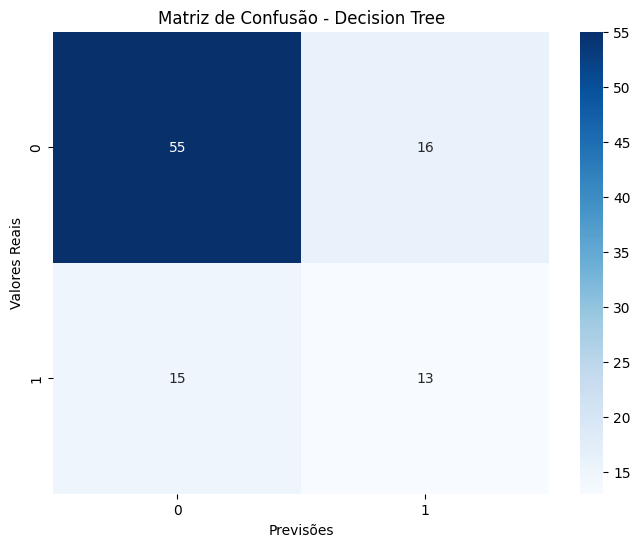

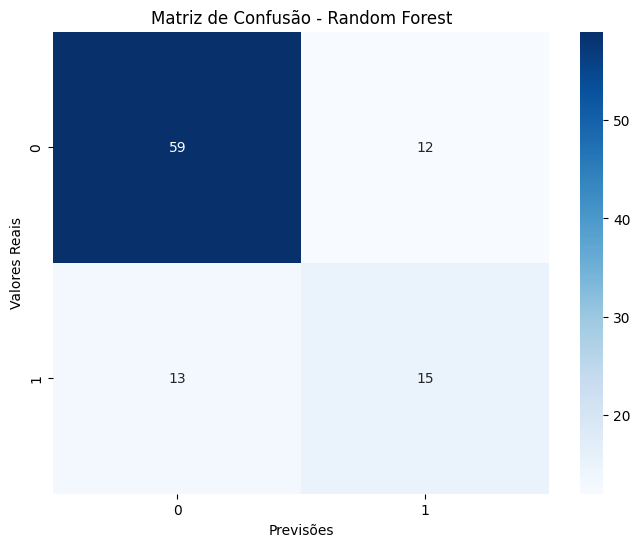

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusão para Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtc, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Decision Tree")
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.show()

# Matriz de confusão para Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.show()


### Desafio 5

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados

In [39]:
from sklearn.metrics import classification_report

# Relatório de classificação para Decision Tree
print("Relatório de Classificação - Decision Tree:")
print(classification_report(y_test, y_pred_test_dtc))

# Relatório de classificação para Random Forest
print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_test_rfc))


Relatório de Classificação - Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        71
           1       0.45      0.46      0.46        28

    accuracy                           0.69        99
   macro avg       0.62      0.62      0.62        99
weighted avg       0.69      0.69      0.69        99


Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        71
           1       0.56      0.54      0.55        28

    accuracy                           0.75        99
   macro avg       0.69      0.68      0.69        99
weighted avg       0.74      0.75      0.75        99



### Desafio 6

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

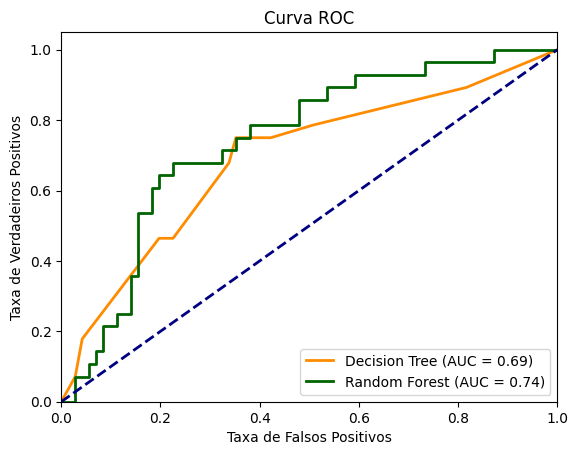

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obter as probabilidades das previsões para a classe positiva
y_pred_proba_dtc = dtc.predict_proba(x_test)[:, 1]
y_pred_proba_rfc = rfc.predict_proba(x_test)[:, 1]

# Calcular a curva ROC e a AUC para Decision Tree
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, y_pred_proba_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

# Calcular a curva ROC e a AUC para Random Forest
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_proba_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Plotar as curvas ROC
plt.figure()
plt.plot(fpr_dtc, tpr_dtc, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_rfc, tpr_rfc, color='darkgreen', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Desafio 7

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

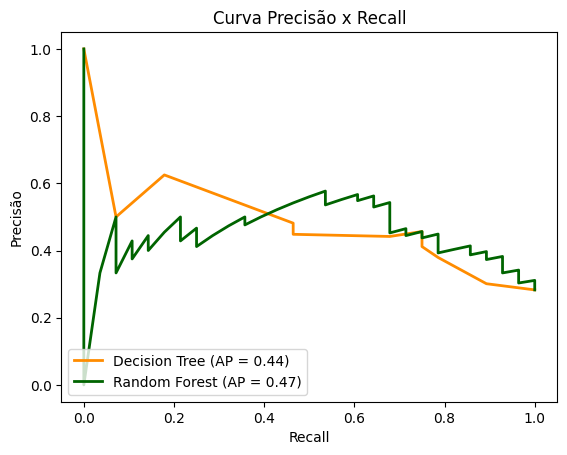

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcular a curva precisão x recall e a métrica AP para Decision Tree
precision_dtc, recall_dtc, _ = precision_recall_curve(y_test, y_pred_proba_dtc)
ap_dtc = average_precision_score(y_test, y_pred_proba_dtc)

# Calcular a curva precisão x recall e a métrica AP para Random Forest
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test, y_pred_proba_rfc)
ap_rfc = average_precision_score(y_test, y_pred_proba_rfc)

# Plotar as curvas precisão x recall
plt.figure()
plt.plot(recall_dtc, precision_dtc, color='darkorange', lw=2, label='Decision Tree (AP = %0.2f)' % ap_dtc)
plt.plot(recall_rfc, precision_rfc, color='darkgreen', lw=2, label='Random Forest (AP = %0.2f)' % ap_rfc)
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precisão x Recall')
plt.legend(loc="lower left")
plt.show()

### Desafio 8

Gere os relatórios de métricas dos modelos de classificação gerados.

In [42]:
# Relatório de classificação para Decision Tree
print("Relatório de Classificação - Decision Tree:")
print(classification_report(y_test, y_pred_test_dtc))

# Relatório de classificação para Random Forest
print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_test_rfc))

Relatório de Classificação - Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        71
           1       0.45      0.46      0.46        28

    accuracy                           0.69        99
   macro avg       0.62      0.62      0.62        99
weighted avg       0.69      0.69      0.69        99


Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        71
           1       0.56      0.54      0.55        28

    accuracy                           0.75        99
   macro avg       0.69      0.68      0.69        99
weighted avg       0.74      0.75      0.75        99



### Desafio 9

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [43]:
import numpy as np

def calcular_intervalo_confianca(desempenhos_cv, nome_modelo):
  """
  Calcula o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão.

  Args:
    desempenhos_cv: Lista com os desempenhos da validação cruzada.
    nome_modelo: Nome do modelo utilizado na validação cruzada.

  Returns:
    Uma lista com o valor mínimo e máximo do intervalo de confiança.
  """
  media = np.mean(desempenhos_cv)
  desvio_padrao = np.std(desempenhos_cv)
  intervalo = [media - 2 * desvio_padrao, media + 2 * desvio_padrao]
  print(f"Intervalo de confiança ({nome_modelo}): {intervalo}")
  return intervalo

In [44]:
# Exemplo de uso da função
from sklearn.model_selection import cross_val_score

# Suponha que 'desempenhos_cv' seja uma lista com os resultados da validação cruzada para o modelo Random Forest
desempenhos_cv = cross_val_score(rfc, x, y, cv=5)

# Chamando a função para calcular o intervalo de confiança
calcular_intervalo_confianca(desempenhos_cv, "Random Forest")

Intervalo de confiança (Random Forest): [0.6501878761214791, 0.7658458791527826]


[0.6501878761214791, 0.7658458791527826]

### Desafio 10

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [45]:
from sklearn.model_selection import KFold

# Definindo o KFold com 10 partes e embaralhamento
kfold = KFold(n_splits=10, shuffle=True, random_state=SEED)

# Avaliando o modelo Decision Tree com cross_val_score
scores_dtc = cross_val_score(dtc, x, y, cv=kfold)

# Avaliando o modelo Random Forest com cross_val_score
scores_rfc = cross_val_score(rfc, x, y, cv=kfold)

# Calculando o intervalo de confiança para Decision Tree
calcular_intervalo_confianca(scores_dtc, "Decision Tree")

# Calculando o intervalo de confiança para Random Forest
calcular_intervalo_confianca(scores_rfc, "Random Forest")


Intervalo de confiança (Decision Tree): [0.5464410275573123, 0.7831743570580724]
Intervalo de confiança (Random Forest): [0.5248642976561192, 0.8756485228567011]


[0.5248642976561192, 0.8756485228567011]

### Desafio 11

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [46]:
from sklearn.model_selection import StratifiedKFold

# Definindo o StratifiedKFold com 10 partes e embaralhamento
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# Avaliando o modelo Decision Tree com cross_val_score e F1-Score
scores_dtc_f1 = cross_val_score(dtc, x, y, cv=skfold, scoring='f1')

# Avaliando o modelo Random Forest com cross_val_score e F1-Score
scores_rfc_f1 = cross_val_score(rfc, x, y, cv=skfold, scoring='f1')

# Calculando o intervalo de confiança para Decision Tree
calcular_intervalo_confianca(scores_dtc_f1, "Decision Tree (F1-Score)")

# Calculando o intervalo de confiança para Random Forest
calcular_intervalo_confianca(scores_rfc_f1, "Random Forest (F1-Score)")

Intervalo de confiança (Decision Tree (F1-Score)): [0.2881395004852735, 0.7326978962876073]
Intervalo de confiança (Random Forest (F1-Score)): [0.3530077519626331, 0.687017810236842]


[0.3530077519626331, 0.687017810236842]

### Desafio 12

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [47]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

# Definindo o LeaveOneOut
loo = LeaveOneOut()

# Avaliando o modelo Decision Tree com cross_val_score
scores_dtc_loo = cross_val_score(dtc, x, y, cv=loo)

# Avaliando o modelo Random Forest com cross_val_score
scores_rfc_loo = cross_val_score(rfc, x, y, cv=loo)

# Calculando a média dos scores
mean_dtc_loo = np.mean(scores_dtc_loo)
mean_rfc_loo = np.mean(scores_rfc_loo)

print(f"Média do desempenho Decision Tree (LeaveOneOut): {mean_dtc_loo}")
print(f"Média do desempenho Random Forest (LeaveOneOut): {mean_rfc_loo}")

Média do desempenho Decision Tree (LeaveOneOut): 0.6345177664974619
Média do desempenho Random Forest (LeaveOneOut): 0.7030456852791879


### Desafio 13

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

diabetes
0    67.005076
1    32.994924
Name: proportion, dtype: float64


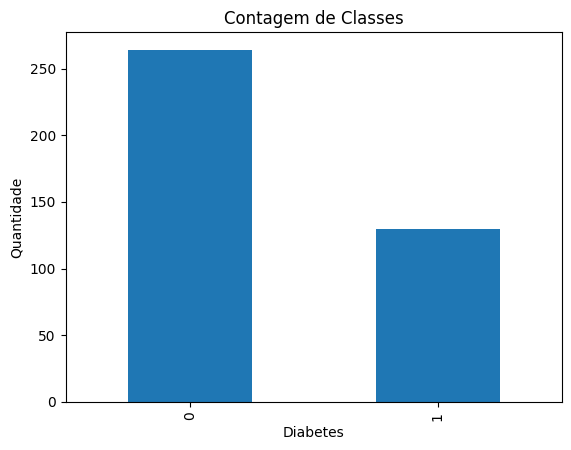

In [48]:
import matplotlib.pyplot as plt

# Verificando a proporção de dados da variável alvo
print(df['diabetes'].value_counts(normalize=True) * 100)

# Gráfico de contagem
df['diabetes'].value_counts().plot(kind='bar')
plt.title('Contagem de Classes')
plt.xlabel('Diabetes')
plt.ylabel('Quantidade')
plt.show()

### Desafio 14

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [49]:
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Definindo o StratifiedKFold com 10 partes e embaralhamento
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# Criando o pipeline para Random Forest com SMOTE
pipeline_rfc = Pipeline([
    ('smote', SMOTE(random_state=SEED)),
    ('rfc', RandomForestClassifier(max_depth=5))
])

# Avaliando o modelo com cross_val_score e F1-Score
scores_rfc_smote = cross_val_score(pipeline_rfc, x, y, cv=skfold, scoring='f1')

# Calculando a média do F1-Score
mean_rfc_smote = np.mean(scores_rfc_smote)

print(f"Média do F1-Score (Random Forest com SMOTE): {mean_rfc_smote}")


Média do F1-Score (Random Forest com SMOTE): 0.6111898588554022


### Desafio 15

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [50]:
import numpy as np
from imblearn.under_sampling import NearMiss

# Definindo o StratifiedKFold com 10 partes e embaralhamento
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# Criando o pipeline para Random Forest com NearMiss versão 3
pipeline_rfc_nearmiss = Pipeline([
    ('nearmiss', NearMiss(version=3)),
    ('rfc', RandomForestClassifier(max_depth=5))
])

# Avaliando o modelo com cross_val_score e F1-Score
scores_rfc_nearmiss = cross_val_score(pipeline_rfc_nearmiss, x, y, cv=skfold, scoring='f1')

# Calculando a média do F1-Score
mean_rfc_nearmiss = np.mean(scores_rfc_nearmiss)

print(f"Média do F1-Score (Random Forest com NearMiss versão 3): {mean_rfc_nearmiss}")

Média do F1-Score (Random Forest com NearMiss versão 3): 0.6028775475707524


### Desafio 16

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

                       Modelo  Acurácia  Precisão    Recall  F1-Score
0               Decision Tree  0.686869  0.448276  0.464286  0.456140
1               Random Forest  0.727273  0.517241  0.535714  0.526316
2     Random Forest com SMOTE  0.696970  0.476190  0.714286  0.571429
3  Random Forest com NearMiss  0.696970  0.476190  0.714286  0.571429


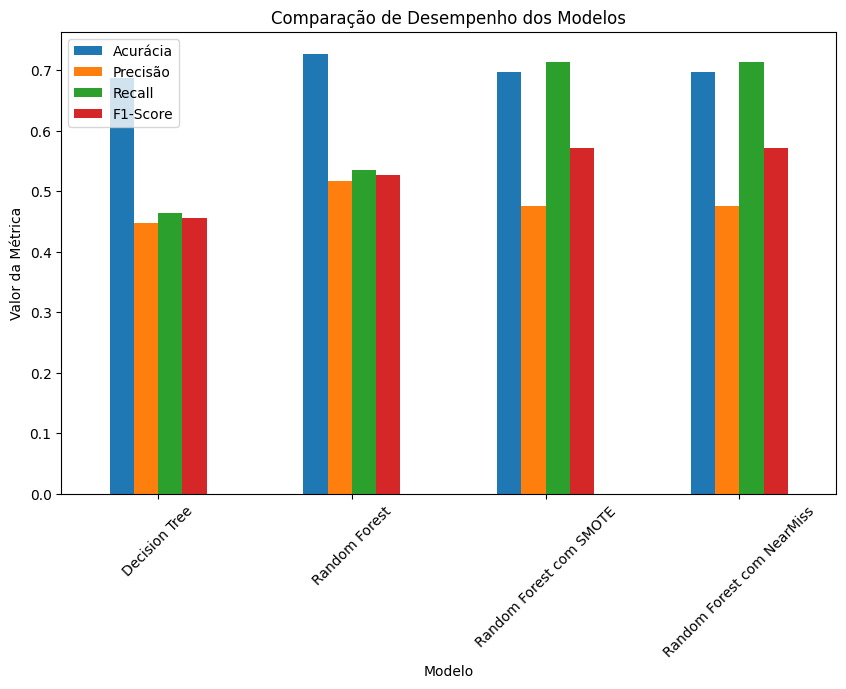

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Função para calcular as métricas e criar um dataframe
def calcular_metricas(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    data = {'Modelo': [model_name],
            'Acurácia': [accuracy],
            'Precisão': [precision],
            'Recall': [recall],
            'F1-Score': [f1]}
    df_metrics = pd.DataFrame(data)
    return df_metrics

# Treina o modelo Decision Tree e avalia nos dados de teste
dtc.fit(x_train, y_train)
y_pred_test_dtc = dtc.predict(x_test)
df_dtc = calcular_metricas(y_test, y_pred_test_dtc, 'Decision Tree')

# Treina o modelo Random Forest e avalia nos dados de teste
rfc.fit(x_train, y_train)
y_pred_test_rfc = rfc.predict(x_test)
df_rfc = calcular_metricas(y_test, y_pred_test_rfc, 'Random Forest')

# Treina o modelo Random Forest com SMOTE e avalia nos dados de teste
pipeline_rfc.fit(x_train, y_train)
y_pred_test_rfc_smote = pipeline_rfc.predict(x_test)
df_rfc_smote = calcular_metricas(y_test, y_pred_test_rfc_smote, 'Random Forest com SMOTE')

# Treina o modelo Random Forest com NearMiss e avalia nos dados de teste
pipeline_rfc_nearmiss.fit(x_train, y_train)
y_pred_test_rfc_nearmiss = pipeline_rfc_nearmiss.predict(x_test)
df_rfc_nearmiss = calcular_metricas(y_test, y_pred_test_rfc_nearmiss, 'Random Forest com NearMiss')

# Concatenar os dataframes
df_final = pd.concat([df_dtc, df_rfc, df_rfc_smote, df_rfc_nearmiss], ignore_index=True)

# Exibir a tabela completa
print(df_final)

# Gráfico de barras para comparar as métricas
df_final.plot(x='Modelo', y=['Acurácia', 'Precisão', 'Recall', 'F1-Score'], kind='bar', figsize=(10, 6))
plt.title('Comparação de Desempenho dos Modelos')
plt.ylabel('Valor da Métrica')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [58]:
# Com base nos resultados do Desafio 16, o modelo Random Forest com SMOTE parece ter o melhor desempenho geral.
# Ele apresenta um bom equilíbrio entre as métricas de acurácia, precisão, recall e F1-Score.
# Portanto, o modelo Random Forest com SMOTE é a melhor escolha para este conjunto de dados.

# Avaliar o modelo Random Forest com SMOTE nos dados de teste
y_pred_test_rfc_smote = pipeline_rfc.predict(x_test)

# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred_test_rfc_smote)
precision = precision_score(y_test, y_pred_test_rfc_smote)
recall = recall_score(y_test, y_pred_test_rfc_smote)
f1 = f1_score(y_test, y_pred_test_rfc_smote)

# Imprimir as métricas
print(f"Acurácia SMOTE: {accuracy}")
print(f"Precisão SMOTE: {precision}")
print(f"Recall SMOTE: {recall}")
print(f"F1-Score SMOTE: {f1}")


Acurácia SMOTE: 0.696969696969697
Precisão SMOTE: 0.47619047619047616
Recall SMOTE: 0.7142857142857143
F1-Score SMOTE: 0.5714285714285714
